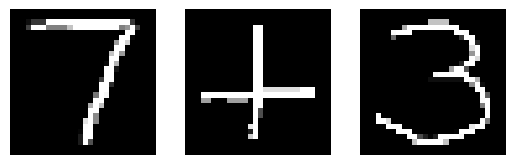

In [1]:
from image_processing import extract_objects
import matplotlib.pyplot as plt

image_path = "equation.png"

resized_images = extract_objects(image_path)

fig, axs = plt.subplots(1, len(resized_images))

for index, resized_image in enumerate(resized_images):

    axs[index].imshow(resized_image, cmap='gray')
    axs[index].axis('off')
plt.show()

In [2]:
import torch
from symbol_classifier import SymbolClassifier

symbol_classifier = SymbolClassifier()

symbol_classifier.load_state_dict(torch.load("model.pt"))

<All keys matched successfully>

In [7]:
expression = ""

for im in resized_images:
    x = torch.tensor(im, dtype=torch.float).unsqueeze(0).unsqueeze(0)
    output = symbol_classifier(x)
    prediction = torch.argmax(output)
    expression += str(prediction.item())

expression

'743'

In [8]:
from expression_evaluation import evaluate_expression

evaluate_expression(expression)

743.0